<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/IBMEC5_luiz_borba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ficha Técnica Disciplina - Data Mining.

Conteúdo - Regressão Linear

Autores:

Anderson Borba (anderson.aborba@professores.ibmec.edu.br) e

Luiz Barboza (luiz.cbjunior@professores.ibmec.edu.br).

Endereço eletrônico: http://quant-ibmec.group/python-e-ml/

## Regressão Linear



In [ ]:
import pandas as pd
nts = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/notas%20-%20ok.csv')
nts

from sklearn.linear_model import LinearRegression
reglin = LinearRegression()
reglin.fit(nts[['AP1','AP2']] , nts['AP3'])
print(reglin.coef_, reglin.intercept_)

def prever_ap3(ap1, ap2):
  ap3 = ap1 * -0.366 + ap2 * 1.383 - 0.825
  return ap3

print(prever_ap3(8,8))
print(prever_ap3(2,4))
print(prever_ap3(3.5,8))

[-0.36608176  1.38338992] -0.8257714929014783
7.310999999999999
3.9749999999999996
8.958


In [ ]:
ap1_ap2_futuras = pd.DataFrame({
    'AP1':[8,2,3.5],
    'AP2':[8,4,8]
})
ap3_futuras = reglin.predict(ap1_ap2_futuras)
ap3_futuras

array([7.31269382, 3.97562468, 8.96006172])

In [ ]:

r2 = reglin.score(nts[['AP1','AP2']] , nts['AP3'])
r2

0.9818896713333346

In [ ]:
ap3_prev = reglin.predict(nts[['AP1','AP2']])

from sklearn import metrics
rr = metrics.r2_score(nts['AP3'] , ap3_prev)
rr

0.9818896713333346

In [ ]:
err_quad = metrics.mean_squared_error(nts['AP3'] , ap3_prev) 
err_quad

import numpy as np
err = np.sqrt(err_quad)
err


0.38145674290172166

In [ ]:
import statsmodels.api as sm

nts[['AP1','AP2']]

ap1_ap2 = sm.add_constant(nts[['AP1','AP2']])
ap1_ap2

rl = sm.OLS(nts['AP3'] , ap1_ap2).fit()
rl.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AP3   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1003.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           5.91e-33
Time:                        17:49:01   Log-Likelihood:                -18.207
No. Observations:                  40   AIC:                             42.41
Df Residuals:                      37   BIC:                             47.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8258      0.265     -3.111      0.004      -1.364      -0.288
AP1           -0.3661      0.030    -12.318      0.000      -0.426      -0.306
AP2            1.3834      0.031     44.788      0.000       1.321       1.446
==============================================================================
Omnibus:                        4.027   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.534
Skew:                           0.642   Prob(JB):                        0.171
Kurtosis:                       2.314   Cond. No.                         43.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


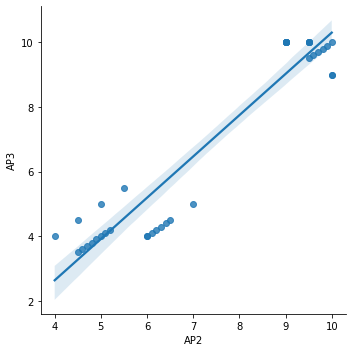

In [ ]:
import seaborn as sns
sns.lmplot('AP2' , 'AP3' , data=nts)


In [ ]:
nts.corr()

,AP1,AP2,AP3,Final
AP1,1.000000,0.278632,0.003717,0.630113
AP2,0.278632,1.000000,0.952691,0.920175
AP3,0.003717,0.952691,1.000000,0.776387
Final,0.630113,0.920175,0.776387,1.000000


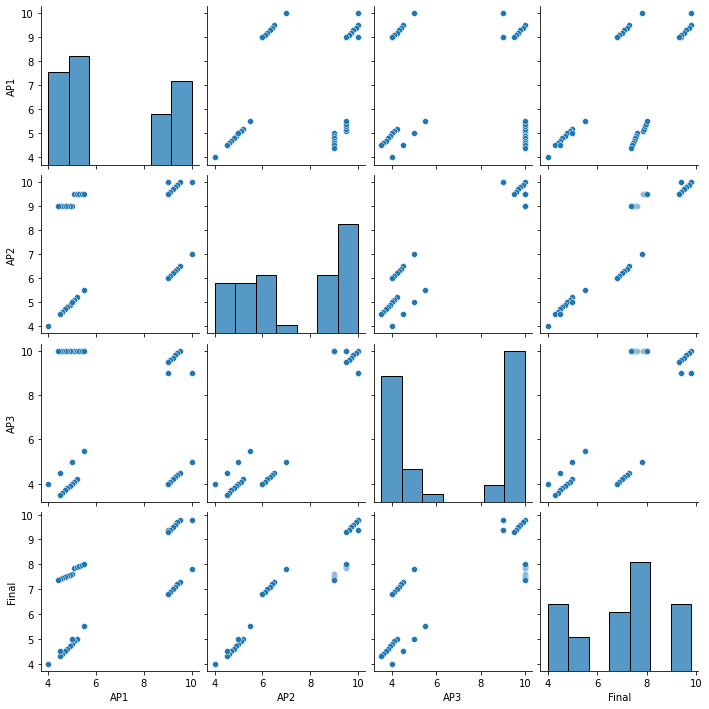

In [ ]:
sns.pairplot(nts)


**[Exercicios] Regressao Linear**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[-0.01783154] 6.303900300544503


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ibov
Feature names seen at fit time, yet now missing:
- bov

  warnings.warn(message, FutureWarning)


array([4.34243043, 4.52074588, 4.69906132, 4.87737676, 5.0556922 ,
       5.23400765])

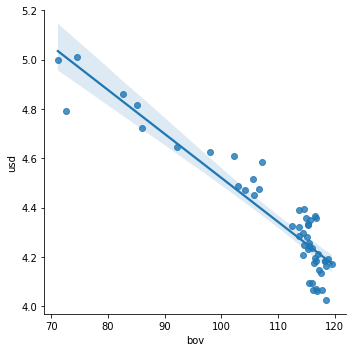

In [ ]:
import pandas as pd
dados = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/usd_ibov_20%20-%2020.csv')
dados.head()

import seaborn as sns
sns.lmplot('bov','usd',data=dados)

from sklearn.linear_model import LinearRegression

rl = LinearRegression()

rl.fit(dados[['bov']] , dados['usd'])
print(rl.coef_,rl.intercept_)

ibov_fut = pd.DataFrame({'ibov':[110,100,90,80,70,60]})
rl.predict(ibov_fut)

# Ideias teóricas sobre regressão linear
Vamos apresentar os conceitos de regressão linear para um conjunto de dados definidos como segue.
## Dados tabelados
Vamos montar o conjunto de dados como mostra a tabela abaixo.

\begin{array}{c} \hline
x & y \\ \hline
x_1 & y_1  \\
x_2 & y_2 \\
x_3 & y_3  \\
x_4 & y_4  \\
x_5 & y_5  \\
 \hline
\end{array}


Assim, vamos aplicar a reta $y = ax+b$, observe que os parâmetros a ser encontrados são $(a, b)$, respectivamente o coeficiente angular e o coeficiente linear da reta. Teremos então,

\begin{array}{c} \hline
y = ax+b \\ 
 \hline\hline
 y_1= ax_1+b \\ 
 y_2= ax_2+b\\
 y_3= ax_3+b \\
 y_4= ax_4+b  \\
 y_5= ax_5+b \\
 \hline
\end{array}

## Representaçao matricial
Os dados acima podem ser representados da seguinte forma:
$$
  \left[ \begin{array}{cc}
   x_1 & 1 \\
   x_2 & 1 \\
   x_3 & 1 \\
   x_4 & 1 \\
   x_5 & 1 \\
  \end{array}  \right]
 \left[\begin{array}{c}
       a\\
       b\\
   \end{array}\right]=
   \left[\begin{array}{c}
      y_1 \\
      y_2\\
      y_3\\
      y_4\\
      y_5\\
   \end{array}\right]. 
$$ 

Definindo,
$$
  M=\left[ \begin{array}{cc}
   x_1 & 1 \\
   x_2 & 1 \\
   x_3 & 1 \\
   x_4 & 1 \\
   x_5 & 1 \\
  \end{array}  \right],
 v=\left[\begin{array}{c}
       a\\
       b\\
   \end{array}\right],
   y=\left[\begin{array}{c}
      y_1 \\
      y_2\\
      y_3\\
      y_4\\
      y_5\\
   \end{array}\right] 
$$ 

$$Mv=y$$
Tomando o sistema linear como base, e multiplicando os dois lados pela matriz $M$ transposta.
$$M^TMv=M^Ty$$
$$
\left[ \begin{array}{ccccc}
   x_1 & x_2 & x_3 & x_4&  x_5\\
     1 &   1 &   1 &   1&    1\\
  \end{array}  \right]
  \left[ \begin{array}{cc}
   x_1 & 1 \\
   x_2 & 1 \\
   x_3 & 1 \\
   x_4 & 1 \\
   x_5 & 1 \\
  \end{array}  \right]
 \left[\begin{array}{c}
       a\\
       b\\
   \end{array}\right]=
   \left[ \begin{array}{ccccc}
   x_1 & x_2 & x_3 & x_4&  x_5\\
     1 &   1 &   1 &   1&    1\\
  \end{array}  \right]
   \left[\begin{array}{c}
      y_1 \\
      y_2\\
      y_3\\
      y_4\\
      y_5\\
   \end{array}\right] 
$$

Gerando o sistema linear,
$$
  \left[ \begin{array}{cc}
   \sum_{i=1}^{5}x_i^2 & \sum_{i=1}^{5}x_i \\
   \sum_{i=1}^{5}x_i& \sum_{i=1}^{5} 1 \\
  \end{array}  \right]
 \left[\begin{array}{c}
       a\\
       b\\
   \end{array}\right]=
   \left[\begin{array}{c}
      \sum_{i=1}^{5}x_iy_i \\
      \sum_{i=1}^{5} y_i\\
   \end{array}\right] 
$$

Definido por,
$$\overline{M}v=\bar{y}$$
onde 
$$\overline{M} = \left[ \begin{array}{cc}
   \sum_{i=1}^{5}x_i^2 & \sum_{i=1}^{5}x_i \\
   \sum_{i=1}^{5}x_i& \sum_{i=1}^{5} 1 \\
  \end{array}  \right]$$
e
$$\bar{y}=\left[\begin{array}{c}
      \sum_{i=1}^{5}x_iy_i \\
      \sum_{i=1}^{5} y_i\\
   \end{array}\right]$$

Resolvendo o sistema linear por eliminação de Gauss.
\begin{equation}\nonumber
    \left[
    \begin{array}{rr|r}
        a_{11} &  a_{12}& \overline{y_1}\\
        a_{21}&   a_{22}& \overline{y_2}\\
    \end{array}
    \right].
\end{equation}

Iniciaremos com a operação por linha,
$L_2=>L_2-\frac{a_{21}}{a_{11}}L_1$
  \begin{equation}\nonumber
    \left[
    \begin{array}{rr|r}
        a_{11} &  a_{12}& \overline{y_1}\\
        0      &  a_{22}-\frac{a_{21}a_{12}}{a_{11}} &\overline{y_2}-\frac{a_{21}\overline{y_1}}{a_{11}}\\
    \end{array}
    \right]
\end{equation}
    \begin{equation}\nonumber
    \left[
    \begin{array}{rr|r}
        a_{11} &  a_{12}& \overline{y_1}\\
        0      &  \frac{a_{22}a_{11}-a_{21}a_{12}}{a_{11}} &\frac{a_{11}\overline{y_2}-a_{21}\overline{y_1}}{a_{11}}\\
    \end{array}
    \right]
\end{equation}
Realizando a seguinte operação por linha teremos,

$L_1=>L_1-\frac{a_{11}a_{12}}{a_{22}a_{11}-a_{21}a_{12}}L_2$

\begin{equation}\nonumber
    \left[
    \begin{array}{rr|r}
        a_{11} &  0                                       & \frac{a_{22}a_{11}\overline{y_1}-a_{12}a_{11}\overline{y_2}}{a_{22}a_{11}-a_{21}a_{12}}\\
        0      &  \frac{a_{22}a_{11}-a_{21}a_{12}}{a_{11}} &\frac{a_{11}\overline{y_2}-a_{21}\overline{y_1}}{a_{11}}\\
    \end{array}
    \right].
\end{equation}

E por fim, para finalizar a forma escalonada,

$L_1=>\frac{1}{a_{11}}L_1$

$L_2=>\frac{a_{11}}{a_{22}a_{11}-a_{21}a_{12}}L_2$

\begin{equation}\nonumber
    \left[
    \begin{array}{rr|r}
        1 &  0                                       & \frac{a_{22}\overline{y_1}-a_{12}\overline{y_2}}{a_{22}a_{11}-a_{21}a_{12}}\\
        0      &  1&\frac{a_{11}\overline{y_2}-a_{21}\overline{y_1}}{a_{22}a_{11}-a_{21}a_{12}}\\
    \end{array}
    \right]
\end{equation}
Desta forma podemos encontrar $(a,b)$,
 \begin{array}{ccc}
   a &=& \frac{a_{22}\overline{y_1}-a_{12}\overline{y_2}}{a_{22}a_{11}-a_{21}a_{12}} \\
   b &=& \frac{a_{11}\overline{y_2}-a_{21}\overline{y_1}}{a_{22}a_{11}-a_{21}a_{12}} \\
  \end{array}  

Resumindo o problema de regressão linear para a base de dados definida acima,
$$
  \left[ \begin{array}{cc}
   \sum_{i=1}^{5}x_i^2 & \sum_{i=1}^{5}x_i \\
   \sum_{i=1}^{5}x_i& \sum_{i=1}^{5} 1 \\
  \end{array}  \right]
 \left[\begin{array}{c}
       a\\
       b\\
   \end{array}\right]=
   \left[\begin{array}{c}
      \sum_{i=1}^{5}x_iy_i \\
      \sum_{i=1}^{5} y_i\\
   \end{array}\right] 
$$
encontramos os parâmetros$ (a,b)$
$$
  \begin{array}{ccc}
   a &=& \frac{5\sum_{i=1}^{5}x_iy_i-\sum_{i=1}^{5}x_i\sum_{i=1}^{5} y_i}{5\sum_{i=1}^{5}x_i^2-\left(\sum_{i=1}^{5}x_i\right)^2} 
   \end{array}
   $$
   $$
     \begin{array}{ccc}
   b &=& \frac{\sum_{i=1}^{5}x_i^2\sum_{i=1}^{5} y_i-\sum_{i=1}^{5}x_i\sum_{i=1}^{5}x_iy_i}{5\sum_{i=1}^{5}x_i^2-\left(\sum_{i=1}^{5}x_i\right)^2} 
  \end{array}  
  $$

Se a base de dados tem $n$ linha podemos usar,
\begin{array}{ccc}
   a &=& \frac{n\sum_{i=1}^{n}x_iy_i-\sum_{i=1}^{n}x_i\sum_{i=1}^{n} y_i}{n\sum_{i=1}^{n}x_i^2-\left(\sum_{i=1}^{n}x_i\right)^2} 
   \end{array}
     \begin{array}{ccc}
   b &=& \frac{\sum_{i=1}^{n}x_i^2\sum_{i=1}^{n} y_i-\sum_{i=1}^{n}x_i\sum_{i=1}^{n}x_iy_i}{n\sum_{i=1}^{n}x_i^2-\left(\sum_{i=1}^{n}x_i\right)^2} 
  \end{array} 

Abaixo programamos duas maneiras de obter os parâmetros $(a,b)$, uma usando a inversão de matrizes da biblioteca Numpy, e outra, encontramos os parâmetros como definido acima. 

### Solução usando a inversão de matrizes na biblioteca Numpy

In [ ]:
# Copiamos a base de dados para uma estrutura de matriz
MAT=nts.to_numpy()
print(MAT)

[[10.   10.    9.    9.8 ]
 [ 9.   10.    9.    9.4 ]
 [ 9.5  10.   10.    9.8 ]
 [ 9.4   9.9   9.9   9.7 ]
 [ 9.3   9.8   9.8   9.6 ]
 [ 9.2   9.7   9.7   9.5 ]
 [ 9.1   9.6   9.6   9.4 ]
 [ 9.    9.5   9.5   9.3 ]
 [10.    7.    5.    7.8 ]
 [ 9.    6.    4.    6.8 ]
 [ 9.5   6.5   4.5   7.3 ]
 [ 9.4   6.4   4.4   7.2 ]
 [ 9.3   6.3   4.3   7.1 ]
 [ 9.2   6.2   4.2   7.  ]
 [ 9.1   6.1   4.1   6.9 ]
 [ 9.    6.    4.    6.8 ]
 [ 5.2   5.2   4.2   5.  ]
 [ 5.1   5.1   4.1   4.9 ]
 [ 5.    5.    4.    4.8 ]
 [ 4.9   4.9   3.9   4.7 ]
 [ 4.8   4.8   3.8   4.6 ]
 [ 4.7   4.7   3.7   4.5 ]
 [ 4.6   4.6   3.6   4.4 ]
 [ 4.5   4.5   3.5   4.3 ]
 [ 4.    4.    4.    4.  ]
 [ 5.    5.    5.    5.  ]
 [ 4.5   4.5   4.5   4.5 ]
 [ 5.5   5.5   5.5   5.5 ]
 [ 5.    9.   10.    7.6 ]
 [ 5.1   9.5  10.    7.84]
 [ 5.2   9.5  10.    7.88]
 [ 5.3   9.5  10.    7.92]
 [ 5.4   9.5  10.    7.96]
 [ 5.5   9.5  10.    8.  ]
 [ 4.9   9.   10.    7.56]
 [ 4.8   9.   10.    7.52]
 [ 4.7   9.   10.    7.48]
 

In [ ]:
dimensao = MAT.shape
m = dimensao[0]
n = dimensao[1]
print("m", m)
print("n", n)

m 40
n 4


In [ ]:
# Definimos os vetores (x,y). Usamos as notas Ap1 da base de dados, mas podia ser qualquer outra coluna. 
import numpy as np
x = np.zeros(m)
y = np.zeros(m)
for k in range(m):
  x[k] = (k + 1)
  y[k] = MAT[k,0]
#
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40.])

In [ ]:
# Definimos o sistema linear MBx=b. MB é a matriz M barra.
BM = np.zeros((2,2))
b = np.zeros(2)
soma1 = 0
soma2 = 0
soma3 = 0
soma4 = 0
soma5 = 0
soma6 = 0
for k in range(m):
  soma1 = soma1 + x[k]**2
  soma2 = soma2 + x[k]
  soma3 = soma3 + x[k]
  soma4 = soma4 + 1
  soma5 = soma5 + x[k] * y[k]
  soma6 = soma6 + y[k]
##
BM[0,0] = soma1
BM[0,1] = soma2
BM[1,0] = soma3
BM[1,1] = soma4
b[0] = soma5
b[1] = soma6

Solução usando subrotinas de inversão de matrizes do numpy

In [ ]:
BMINV = np.zeros((2,2))
MBINV = np.linalg.inv(BM)
sol = np.zeros(2)
sol = MBINV @ b
sol

array([-0.16189493,  9.97384615])

### Solução usando eliminação de Gauss

In [ ]:
s = np.zeros(2)
s[0] = (m * b[0] - BM[1,0] * b[1]) / (m * BM[0,0] - (BM[0,1])**2)
s[1] = (BM[0,0] * b[1] - BM[1,0] * b[0]) / (m * BM[0,0] - (BM[0,1])**2)
s

array([-0.16189493,  9.97384615])

Rotina para gerar o gráfico da base de dados e a aproximação por regressão linear.

In [ ]:
reta_aprox = np.zeros(m)
xp = np.zeros(m)
for k in range(1, m): 
  xp[k - 1] = (x[k] + x[k - 1]) / 2
for k in range(1, m):
  reta_aprox[k - 1] = s[0] * xp[k - 1]  + s[1]

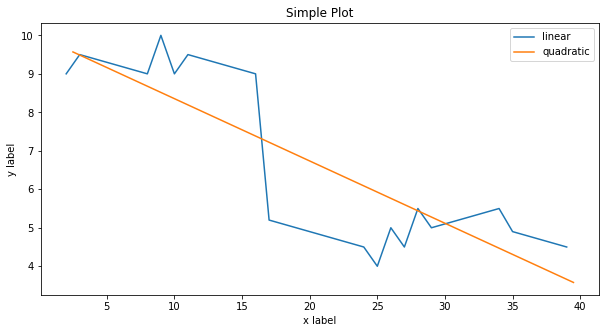

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(x[1: m-1], y[1: m-1], label='linear')  # Plot some data on the (implicit) axes.
plt.plot(xp[1: m-1], reta_aprox[1: m-1], label='quadratic')  # etc.
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

# Referência
- Applied Numerical Linear Algebra - Jammes Demmel - Editora SIAM.

- Reconhecimento de padrões - Rogério Negri - Editora Blucher 
